In [75]:
from __future__ import print_function
import numpy as np
import cv2

In [80]:
### CAPTURE VIDEO
cam = cv2.VideoCapture(0)
ret, img = cam.read()
cv2.destroyAllWindows() 
cam.release()

In [81]:
from matplotlib.pyplot import imshow
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = (12, 8)

In [82]:
%matplotlib inline

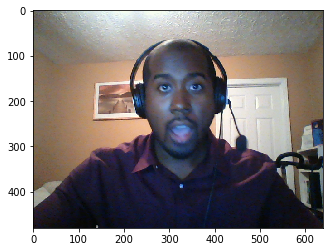

In [83]:
imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [84]:
import requests

In [85]:
import PIL

In [86]:
from io import BytesIO
import configuration # Load Key from config.py

In [87]:
f = BytesIO()
PIL.Image.fromarray(img).save(f, 'png')
data = f.getvalue()

In [88]:
API_KEY = configuration.face_subscription_key

In [89]:
endpoint = 'https://eastus2.api.cognitive.microsoft.com/face/v1.0/detect'
args = {'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'age,gender,emotion'}
headers = {'Content-Type': 'application/octet-stream',
           'Ocp-Apim-Subscription-Key': API_KEY}

In [90]:
response = requests.post(data=data,url=endpoint,headers=headers,params=args)

In [91]:
response

<Response [200]>

In [92]:
response.json()

[{'faceId': 'b77c9f82-f684-4d9d-a06b-75a43f5b1552',
  'faceRectangle': {'top': 125, 'left': 242, 'width': 168, 'height': 168},
  'faceAttributes': {'gender': 'male',
   'age': 27.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.97,
    'sadness': 0.0,
    'surprise': 0.029}}}]

In [93]:
from matplotlib.patches import Polygon
from matplotlib.pyplot import gcf, gca

{'gender': 'male', 'age': 27.0, 'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.0, 'neutral': 0.97, 'sadness': 0.0, 'surprise': 0.029}


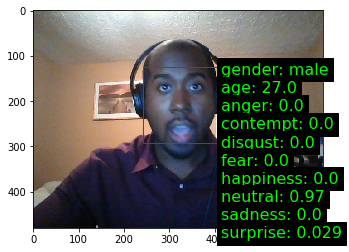

In [94]:
ax = imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for face in response.json():
    rect = face['faceRectangle']
    fattr = face['faceAttributes']
    left, top, width, height = rect['left'], rect['top'], rect['width'], rect['height']
    path = [[left, top], [left + width, top], 
            [left + width, top + height], [left, top + height]]
    ax.axes.add_patch(Polygon(path, edgecolor='red', facecolor='none'))
    disp = {'gender': fattr['gender'],
                 'age': fattr['age']}
    disp.update(fattr['emotion'])
    print(disp)
    for i, k in enumerate(disp):
        ax.axes.text(left+width+5, top + 16 + 40*i, "{0}: {1}".format(k, disp[k]),
                     color='lime', fontsize=16, backgroundcolor='black')